In [ ]:
#Importing The Packages
import torch
from torch import optim
from torch import nn
import torch.nn.functional as F
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import helper
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
#Normalizing The Dataset
transformed = transforms.Compose([transforms.ToTensor(),
                             transforms.Normalize((0.5,),
                                                  (0.5,))]
                                )

#Downloading The Trainset
trainset = dataset.FashionMNIST('FMNIST',
                                download = True,
                                train = True,
                                transform = transformed)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size = 64,
                                          shuffle = True)

#Downloading The TestSet
testset = dataset.FashionMNIST('FMNST',
                               download = True,
                               train = False,
                               transform = transformed)

testloader =  torch.utils.data.DataLoader(testset,
                                         batch_size = 64,
                                         shuffle = True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to FMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FMNIST/FashionMNIST/raw



  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting FMNST/FashionMNIST/raw/train-images-idx3-ubyte.gz to FMNST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting FMNST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FMNST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting FMNST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FMNST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting FMNST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FMNST/FashionMNIST/raw



In [ ]:

#Spliting The Dataset
dataiter = iter(trainloader)
images, labels = dataiter.__next__()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


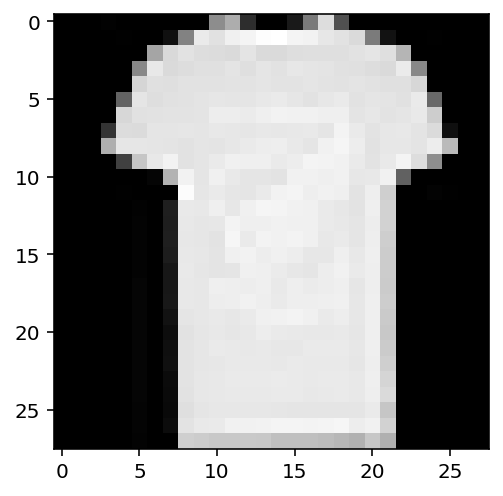

In [ ]:
#Plotting a Visualization
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [ ]:
#Defining The Networks Architecture
class Neural_Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)
      
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x), dim = 1)
    
    return x

In [ ]:
model = Neural_Network()
model

Neural_Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:

#Initializing Loss and Optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
#Training The Network
epoch = 10

for x in range(epoch):
  running_loss = 0
  for images, labels in trainloader:
    
    #Flattening The Image
    images = images.view(images.shape[0], -1)
    
    #Clearing Previous Gradients
    optimizer.zero_grad()
    
    #-> Forward Pass 
    #-> Calculating Loss 
    #-> Calculating Gradients Through Backward Pass
    #-> Updating the Weights, using optimizer.step()
    
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    
  else:
    print(f"Training Loss: {running_loss/len(trainloader)}")

Training Loss: 0.519314136618236
Training Loss: 0.38043012982333646
Training Loss: 0.34153948123775313
Training Loss: 0.31461230234932036
Training Loss: 0.29706941796009984
Training Loss: 0.278936402661714
Training Loss: 0.2659660887155833
Training Loss: 0.25237968216922235
Training Loss: 0.24240243260556066
Training Loss: 0.23244685781742336


In [ ]:

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9922, -1.0000,
         -0.9922, -0.9922, -

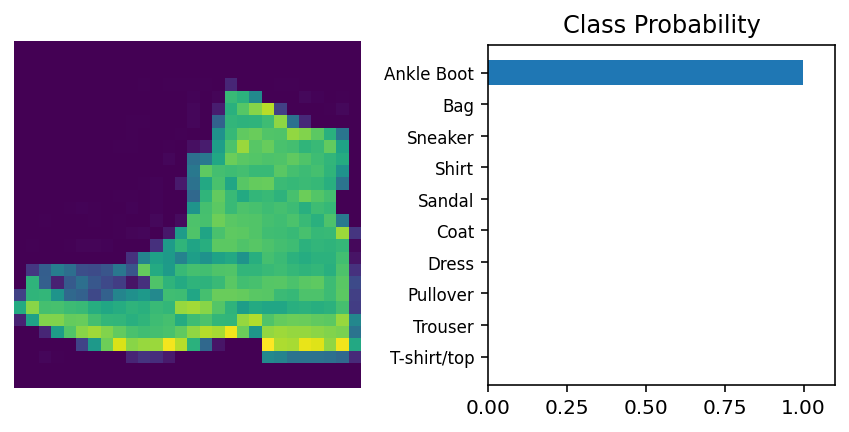

In [ ]:
#Checking our model

images, labels = next(iter(testloader))

img = images[2].view(1, 784)
print(img)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = torch.exp(logps)
view_classify(img, ps, version='Fashion')

In [ ]:
import cv2
import tensorflow as tf
img = cv2.imread('/content/drive/MyDrive/TER/tshirt.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)
img =  cv2.resize(img, (28,28))
print(type(img))
img = torch.from_numpy(img)
print(type(img))
print(img.shape)
img = img.reshape(1, img.shape[0], img.shape[1])
print(img.shape)
print(img.dtype)
#img.type(torch.DoubleTensor)
#print(img.dtype)


<class 'numpy.ndarray'>
<class 'torch.Tensor'>
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.float32


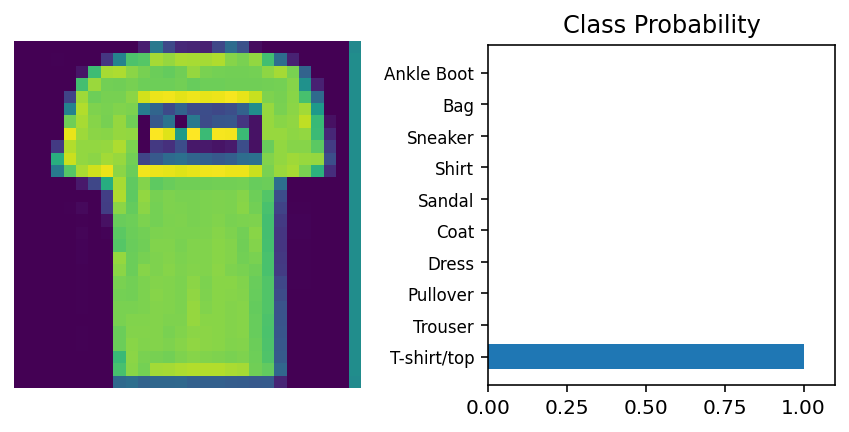

In [ ]:
# Turn off gradients to speed up this part
img = img.view(1, 784)
with torch.no_grad():
    logps = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = torch.exp(logps)
view_classify(img, ps, version='Fashion')

In [ ]:
torch.save(model.state_dict(), 'mnist_fashion_pytorch.pt')